# Fully connected Deep neural network for handwritten digits recognition

## Import libraries

In [1]:
from keras.datasets import mnist
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
import matplotlib.pyplot as plt
from keras.utils import to_categorical
import tensorflow as tf

2024-08-21 11:49:09.255599: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Get mnist dataset

In [2]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11490434/11490434 [==============================] - 4s 0us/step


## Print the shapes of the dataset

In [3]:
print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)
print("X_test shape:", X_test.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)
X_test shape: (10000, 28, 28)
Y_test shape: (10000,)


## Try show the first image in the X_train 3D array

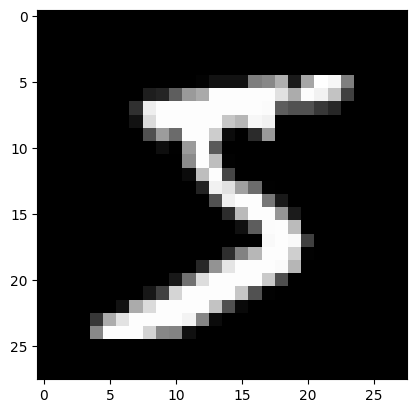

In [4]:
plt.imshow(X_train[0], cmap="gray")
plt.show()

## Reshape the images from 2D to 1D and scale between 0 to 1

In [5]:
X_train = X_train.reshape(X_train.shape[0], 784) / 255.0
X_test = X_test.reshape(X_test.shape[0], 784) / 255.0

## Make the labels into categorical or one-hot with 10 possible situations

In [6]:
Y_train = to_categorical(Y_train, 10)
Y_test = to_categorical(Y_test, 10)

## Init model

In [7]:
model = Sequential()

2024-08-21 11:49:17.941411: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-08-21 11:49:17.967531: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-08-21 11:49:17.968166: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

## Add hidden layers

In [8]:
model.add(Dense(units=256, activation="relu", input_dim=784))
model.add(Dense(units=256, activation="relu"))
model.add(Dense(units=256, activation="relu"))

## Add the output layer

In [9]:
model.add(Dense(units=10, activation="softmax"))

## Compile the model

In [10]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

## Train the model

In [11]:
with tf.device('/GPU:0'):
	model.fit(X_train, Y_train, epochs=100, batch_size=1024)

2024-08-21 11:49:18.800442: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.
2024-08-21 11:49:19.109190: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/100


2024-08-21 11:49:20.195145: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x1af8bfc0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-08-21 11:49:20.195187: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA GeForce 940MX, Compute Capability 5.0
2024-08-21 11:49:20.304016: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600
2024-08-21 11:49:20.604169: I ./tensorflow/compiler/jit/device_compiler.h:180] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


59/59 [==============================] - 2s 9ms/step - loss: 2.2419 - accuracy: 0.2247
Epoch 2/100
59/59 [==============================] - 1s 10ms/step - loss: 2.0474 - accuracy: 0.5136
Epoch 3/100
59/59 [==============================] - 1s 9ms/step - loss: 1.7626 - accuracy: 0.6710
Epoch 4/100
59/59 [==============================] - 1s 10ms/step - loss: 1.3879 - accuracy: 0.7400
Epoch 5/100
59/59 [==============================] - 1s 10ms/step - loss: 1.0481 - accuracy: 0.7842
Epoch 6/100
59/59 [==============================] - 1s 9ms/step - loss: 0.8231 - accuracy: 0.8137
Epoch 7/100
59/59 [==============================] - 1s 9ms/step - loss: 0.6869 - accuracy: 0.8342
Epoch 8/100
59/59 [==============================] - 1s 10ms/step - loss: 0.6006 - accuracy: 0.8483
Epoch 9/100
59/59 [==============================] - 1s 10ms/step - loss: 0.5417 - accuracy: 0.8595
Epoch 10/100
59/59 [==============================] - 1s 9ms/step - loss: 0.4993 - accuracy: 0.8679
Epoch 11/100
59/

## Evaluate the model

In [12]:
loss, accuracy = model.evaluate(X_test, Y_test)
print("loss:", loss)
print("accuracy:", accuracy)

313/313 [==============================] - 2s 4ms/step - loss: 0.1682 - accuracy: 0.9513
loss: 0.16819705069065094
accuracy: 0.9513000249862671


## Manual testing

In [13]:
import random

random_start = random.randint(0, 9990)
for i in range(random_start, random_start + 10):
  X_single = X_test[i].reshape(1, 784)
  prediction = model.predict(X_single)

  predicted_class = np.argmax(prediction, axis=1)
  label = np.argmax(Y_test[i])
  print(f"Prediction: {predicted_class}, Correct: {label}")

  if predicted_class != label:
    img = X_single.reshape(28, 28)
    plt.imshow(img, cmap="gray")
    break

1/1 [==============================] - 0s 197ms/step
Prediction: [4], Correct: 4
1/1 [==============================] - 0s 27ms/step
Prediction: [7], Correct: 7
1/1 [==============================] - 0s 28ms/step
Prediction: [2], Correct: 2
1/1 [==============================] - 0s 28ms/step
Prediction: [5], Correct: 5
1/1 [==============================] - 0s 25ms/step
Prediction: [6], Correct: 6
1/1 [==============================] - 0s 28ms/step
Prediction: [3], Correct: 3
1/1 [==============================] - 0s 28ms/step
Prediction: [6], Correct: 6
1/1 [==============================] - 0s 28ms/step
Prediction: [9], Correct: 9
1/1 [==============================] - 0s 28ms/step
Prediction: [6], Correct: 6
1/1 [==============================] - 0s 28ms/step
Prediction: [3], Correct: 3
